In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#ml 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow import keras

import seaborn as sns
from sklearn.metrics import confusion_matrix


In [67]:
# get data
df = pd.read_csv("/Users/nolanpestano/Documents/GitHub/IT3040/Project1-nrpw88/shopping.csv") # absoluet path bc im lazy

print(df.head())

columns_to_normalize = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues",
    "SpecialDay",
    "Browser",
    "Region",
    "TrafficType",
    "OperatingSystems",
    "Month",
    "VisitorType"
]

# confusion matrix
def get_confusion_matrix(model, X_test, y_test):
    return confusion_matrix(y_test, model.predict(X_test) >= 0.5)

def plot_confusion_matrix(model, X_test, y_test):
    cm = get_confusion_matrix(model, X_test, y_test)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()





   Administrative  Administrative_Duration  Informational  \
0               3               142.500000              0   
1               6               437.391304              2   
2               1                41.125000              0   
3               2               141.000000              0   
4              18               608.140000              6   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00              48              1052.255952   
1                  235.55              83              2503.881781   
2                    0.00             126              4310.004668   
3                    0.00              10               606.666667   
4                  733.80             168              4948.398759   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.004348   0.013043    0.000000         0.0   Nov                 1   
1     0.002198   0.004916    2.086218         0.0   Mar   

In [68]:
# transformations from last proj

# stuff to transform strings into text
# described in the assignment

months = {
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "June": 6,
    "Jul": 7,
    "Aug": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dec": 12
}

visitor_types = {
    "Returning_Visitor": 1,
    "New_Visitor": 2,
    "Other": 3
}
print(df.head())
df["Month"] = df["Month"].map(months)
df["VisitorType"] = df["VisitorType"].map(visitor_types)

# super cool way to conver bools to ints 
# https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe
df["Weekend"] = df["Weekend"].astype(int)
df["Revenue"] = df["Revenue"].astype(int)
print("-----")
print(df.head())

# scaling from scykit learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# we'll scale every column thats not the binary (revenue and features)

features = df.drop(columns=["Revenue"])
y = df["Revenue"]

# print(df.head())
# apply the scaler to the columns we want to normalize
features[columns_to_normalize] = scaler.fit_transform(features[columns_to_normalize])

# better naming consistent to standards
X = features


print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

#look at the first X row
features.head()

# bingo


   Administrative  Administrative_Duration  Informational  \
0               3               142.500000              0   
1               6               437.391304              2   
2               1                41.125000              0   
3               2               141.000000              0   
4              18               608.140000              6   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                    0.00              48              1052.255952   
1                  235.55              83              2503.881781   
2                    0.00             126              4310.004668   
3                    0.00              10               606.666667   
4                  733.80             168              4948.398759   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.004348   0.013043    0.000000         0.0   Nov                 1   
1     0.002198   0.004916    2.086218         0.0   Mar   

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.211736,0.352064,-0.387872,-0.237167,0.357860,-0.069031,-0.376478,-0.619388,-0.314427,-0.313118,0.995789,-1.227701,3.262510,1.177217,1.716364,-0.399326,0
1,1.112739,2.008648,1.146433,1.318397,1.135092,0.622058,-0.419455,-0.782413,-0.200199,-0.313118,-1.359714,-0.155660,-0.206646,-0.067462,-0.513002,-0.399326,0
2,-0.388933,-0.217421,-0.387872,-0.237167,2.089977,1.481915,-0.449638,-0.623814,-0.125468,-0.313118,0.995789,-0.155660,-0.206646,-0.482354,-0.513002,-0.399326,0
3,-0.088599,0.343638,-0.387872,-0.237167,-0.485992,-0.281167,-0.296813,-0.351694,1.693524,-0.313118,0.112475,-0.155660,1.527932,1.592109,-0.017587,-0.399326,0
4,4.716753,2.967847,4.215043,4.608822,3.022656,1.785842,-0.330825,-0.609679,0.241360,-0.313118,0.112475,-0.155660,-0.206646,-0.067462,-0.760709,-0.399326,1


## our data looks great, lets split into test samples
we'll use a 60 20 20 split, of training, cv, and test respectively

In [69]:
# scy kit does a lot of the work for us

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)



# should be 3000, 1000, 1000
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_cv shape: {X_cv.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_cv shape: {y_cv.shape}")

X_train shape: (3000, 17)
X_test shape: (1000, 17)
X_cv shape: (1000, 17)
y_train shape: (3000,)
y_test shape: (1000,)
y_cv shape: (1000,)


### next step is to actually construct the model

In [70]:
# we have the will to test different model structures
# for now lets start with a baseline

my_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])

# mean squared error is a fair enough choice
# compile the model
my_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

# fit the model
history = my_model.fit(
    X_train, y_train,
    validation_data = (X_cv, y_cv),
    epochs = 100
)

# history data
print(history.history.keys())


Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5573 - accuracy: 0.8503 - val_loss: 0.4583 - val_accuracy: 0.8450
Epoch 2/100
94/94 [==============================] - 0s 687us/step - loss: 0.4023 - accuracy: 0.8510 - val_loss: 0.3741 - val_accuracy: 0.8450
Epoch 3/100
94/94 [==============================] - 0s 694us/step - loss: 0.3399 - accuracy: 0.8537 - val_loss: 0.3357 - val_accuracy: 0.8490
Epoch 4/100
94/94 [==============================] - 0s 807us/step - loss: 0.3066 - accuracy: 0.8693 - val_loss: 0.3143 - val_accuracy: 0.8590
Epoch 5/100
94/94 [==============================] - 0s 820us/step - loss: 0.2879 - accuracy: 0.8820 - val_loss: 0.3016 - val_accuracy: 0.8670
Epoch 6/100
94/94 [==============================] - 0s 705us/step - loss: 0.2775 - accuracy: 0.8833 - val_loss: 0.2955 - val_accuracy: 0.8670
Epoch 7/100
94/94 [==============================] - 0s 680us/step - loss: 0.2709 - accuracy: 0.8890 - val_loss: 0.2900 - val_accuracy: 0.8710
E

differnece between train and validation loss: -0.08763733506202698
32/32 [==============================] - 0s 359us/step


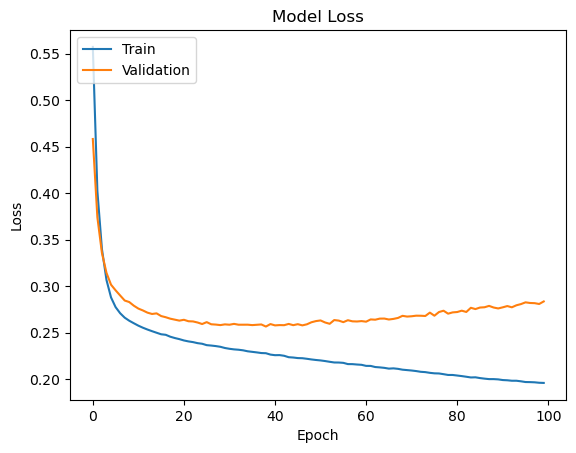

In [71]:
# summary for loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
print(f"differnece between train and validation loss: {history.history['loss'][-1] - history.history['val_loss'][-1]}")

cnf = confusion_matrix(y_test, my_model.predict(X_test) >= 0.5)

32/32 [==============================] - 0s 365us/step


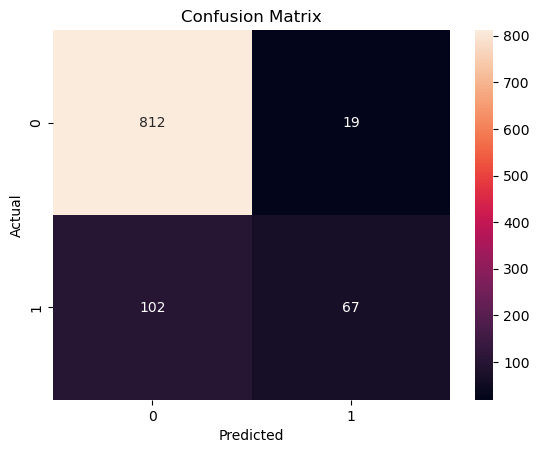

In [72]:
plot_confusion_matrix(my_model, X_test, y_test)

## because our model's loss is increasing in the validation set, while our loss for training decreases, this is an ***overfit*** model
 we can combat this by adding regularization

In [73]:
new_and_improved = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=[X_train.shape[1]], kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(8, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(1)
])

new_and_improved.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

new_history = new_and_improved.fit(
    X_train, y_train,
    validation_data = (X_cv, y_cv),
    epochs = 100
)

    

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.7786 - accuracy: 0.8320 - val_loss: 0.6413 - val_accuracy: 0.8450
Epoch 2/100
94/94 [==============================] - 0s 676us/step - loss: 0.5711 - accuracy: 0.8563 - val_loss: 0.5353 - val_accuracy: 0.8550
Epoch 3/100
94/94 [==============================] - 0s 666us/step - loss: 0.4909 - accuracy: 0.8717 - val_loss: 0.4805 - val_accuracy: 0.8630
Epoch 4/100
94/94 [==============================] - 0s 693us/step - loss: 0.4424 - accuracy: 0.8813 - val_loss: 0.4437 - val_accuracy: 0.8690
Epoch 5/100
94/94 [==============================] - 0s 784us/step - loss: 0.4090 - accuracy: 0.8833 - val_loss: 0.4152 - val_accuracy: 0.8740
Epoch 6/100
94/94 [==============================] - 0s 803us/step - loss: 0.3845 - accuracy: 0.8833 - val_loss: 0.3952 - val_accuracy: 0.8730
Epoch 7/100
94/94 [==============================] - 0s 835us/step - loss: 0.3653 - accuracy: 0.8860 - val_loss: 0.3792 - val_accuracy: 0.8730
E

differnece between train and validation loss: -0.029826819896697998


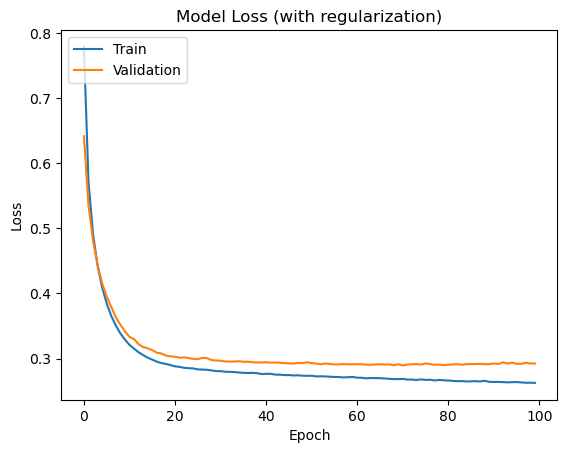

In [74]:
# new history data

plt.plot(new_history.history["loss"])
plt.plot(new_history.history["val_loss"])
plt.title("Model Loss (with regularization)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
print(f"differnece between train and validation loss: {new_history.history['loss'][-1] - new_history.history['val_loss'][-1]}")


32/32 [==============================] - 0s 384us/step


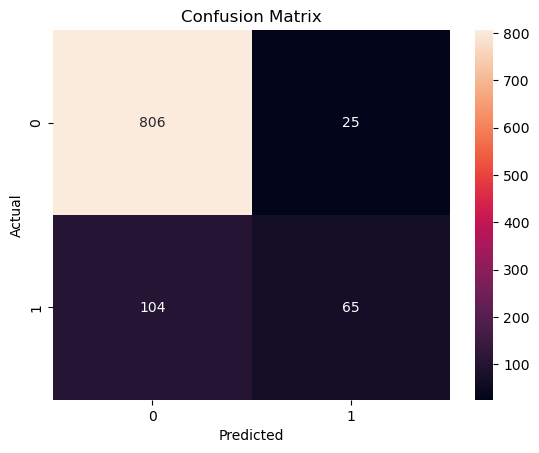

In [79]:
plot_confusion_matrix(new_and_improved, X_test, y_test)

### sweet! our cross validation and training are now much closer
lets increase the reg and see how that goes

In [75]:
maybe_more_improved = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=[X_train.shape[1]], kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dense(8, activation="relu", kernel_regularizer=keras.regularizers.l2(0.1)),
    keras.layers.Dense(1)
])

maybe_more_improved.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

another_new_history = new_and_improved.fit(
    X_train, y_train,
    validation_data = (X_cv, y_cv),
    epochs = 100
)
    

Epoch 1/100
94/94 [==============================] - 0s 967us/step - loss: 0.2628 - accuracy: 0.8933 - val_loss: 0.2935 - val_accuracy: 0.8800
Epoch 2/100
94/94 [==============================] - 0s 833us/step - loss: 0.2624 - accuracy: 0.8950 - val_loss: 0.2918 - val_accuracy: 0.8800
Epoch 3/100
94/94 [==============================] - 0s 683us/step - loss: 0.2621 - accuracy: 0.8957 - val_loss: 0.2923 - val_accuracy: 0.8800
Epoch 4/100
94/94 [==============================] - 0s 681us/step - loss: 0.2622 - accuracy: 0.8957 - val_loss: 0.2934 - val_accuracy: 0.8790
Epoch 5/100
94/94 [==============================] - 0s 696us/step - loss: 0.2624 - accuracy: 0.8950 - val_loss: 0.2934 - val_accuracy: 0.8790
Epoch 6/100
94/94 [==============================] - 0s 690us/step - loss: 0.2624 - accuracy: 0.8953 - val_loss: 0.2914 - val_accuracy: 0.8780
Epoch 7/100
94/94 [==============================] - 0s 720us/step - loss: 0.2622 - accuracy: 0.8947 - val_loss: 0.2925 - val_accuracy: 0.8800

difference between train loss and validation loss: 0.2522830665111542 - 0.29363080859184265


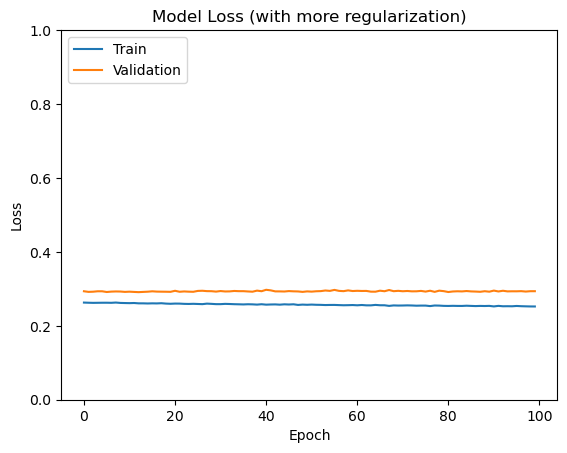

In [78]:
another_new_history.history.keys()
plt.plot(another_new_history.history["loss"])
plt.plot(another_new_history.history["val_loss"])
plt.title("Model Loss (with more regularization)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
# change the range on the y axis
plt.ylim(0, 1)
print(f"difference between train loss and validation loss: {another_new_history.history['loss'][-1]} - {another_new_history.history['val_loss'][-1]}")

32/32 [==============================] - 0s 829us/step


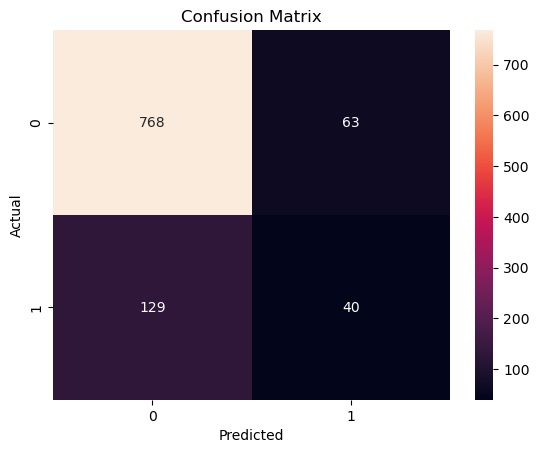

In [80]:
plot_confusion_matrix(maybe_more_improved, X_test, y_test)

### right so our regularization is too high at .1! we can see that because our loss really isnt changing. these results were worse than the other .01 actually!

since our .01 was good for regurlaztion, what if we do .001?

In [81]:
smaller_reg = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=[X_train.shape[1]], kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(8, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1)
])

smaller_reg.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

smaller_history = new_and_improved.fit(
    X_train, y_train,
    validation_data = (X_cv, y_cv),
    epochs = 100
)
    

Epoch 1/100
94/94 [==============================] - 0s 901us/step - loss: 0.2520 - accuracy: 0.8997 - val_loss: 0.2933 - val_accuracy: 0.8820
Epoch 2/100
94/94 [==============================] - 0s 692us/step - loss: 0.2524 - accuracy: 0.9013 - val_loss: 0.2926 - val_accuracy: 0.8790
Epoch 3/100
94/94 [==============================] - 0s 704us/step - loss: 0.2530 - accuracy: 0.9010 - val_loss: 0.2915 - val_accuracy: 0.8820
Epoch 4/100
94/94 [==============================] - 0s 679us/step - loss: 0.2523 - accuracy: 0.9003 - val_loss: 0.2926 - val_accuracy: 0.8820
Epoch 5/100
94/94 [==============================] - 0s 680us/step - loss: 0.2523 - accuracy: 0.9007 - val_loss: 0.2904 - val_accuracy: 0.8820
Epoch 6/100
94/94 [==============================] - 0s 673us/step - loss: 0.2522 - accuracy: 0.9010 - val_loss: 0.2923 - val_accuracy: 0.8840
Epoch 7/100
94/94 [==============================] - 0s 688us/step - loss: 0.2534 - accuracy: 0.8980 - val_loss: 0.2922 - val_accuracy: 0.8810

(0.0, 1.0)

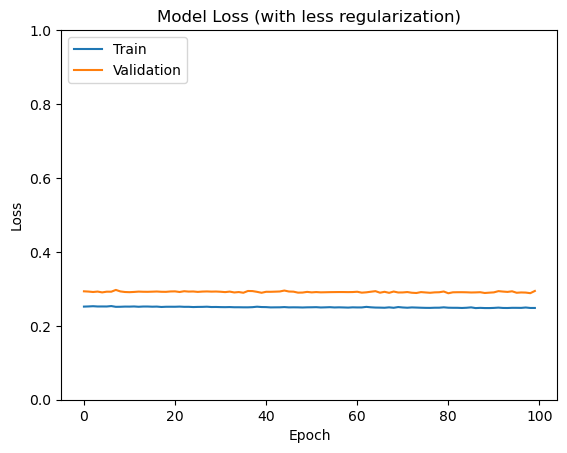

In [83]:
plt.plot(smaller_history.history["loss"])
plt.plot(smaller_history.history["val_loss"])
plt.title("Model Loss (with less regularization)")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.ylim(0, 1)

32/32 [==============================] - 0s 369us/step


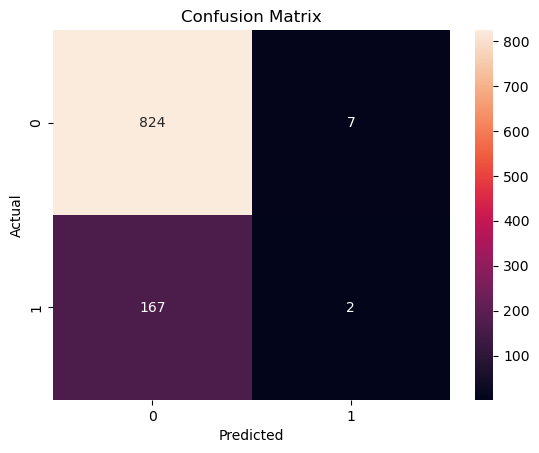

In [84]:
plot_confusion_matrix(smaller_reg, X_test, y_test)

### not fantastic either, note the 2 correctly predicted shoppers haha

so we can conclude that .01 is a good regularization term, what happens if we change then node structure?